### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# checking the encoding type
import chardet

In [4]:
with open("companies.csv","rb") as com:
    result = chardet.detect(com.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4610845903762258, 'language': 'Turkish'}


In [5]:
with open("rounds2.csv","rb") as round2:
    result = chardet.detect(round2.read())
print(result)

{'encoding': 'Windows-1254', 'confidence': 0.4186155476629225, 'language': 'Turkish'}


In [6]:
# unable to open the file with suggested encoding because of special characters so we have used "palmos" to solve this problem
#companies = pd.read_csv("companies.csv",encoding="Windows-1254")
#companies

In [7]:
#rounds2 = pd.read_csv("companies.csv",encoding="Windows-1254")
#rounds2

In [8]:
# loading the required data
rounds2 = pd.read_csv("rounds2.csv",encoding="palmos")
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/Ã”ASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [9]:
rounds2["company_permalink"] = rounds2["company_permalink"].apply(lambda x: x.lower())
rounds2

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [10]:
# getting the count of unique id of the company in rounds2
print(rounds2["company_permalink"].unique().size)

66368


In [11]:
rounds2["company_permalink"].value_counts()

/organization/solarflare                 19
/organization/exagen-diagnostics         18
/organization/quellan                    18
/organization/semprius                   18
/organization/endogastric-solutions      17
                                         ..
/organization/s-a-automotive-partners     1
/organization/invensor                    1
/organization/klab                        1
/organization/wholelife-companies         1
/organization/cavalry                     1
Name: company_permalink, Length: 66368, dtype: int64

In [12]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [13]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [14]:
companies = pd.read_csv("companies.csv",encoding="palmos")
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/Ã”Asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [15]:
companies["permalink"] = companies["permalink"].apply(lambda x: x.lower())
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [16]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [17]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [18]:
# here we can see that homepage_url has some duplicates even after taking the null values into count 
print(companies["name"].unique().size)
print(companies["permalink"].unique().size)
print(companies["homepage_url"].unique().size)

66100
66368
61192


In [19]:
# checking the unique ids matching in both the dataframes, here we can see that every element is present in both the dataframes
companies["permalink"].isin(rounds2["company_permalink"]).value_counts()

True    66368
Name: permalink, dtype: int64

In [20]:
rounds2["company_permalink"].isin(companies["permalink"]).value_counts()

True    114949
Name: company_permalink, dtype: int64

In [21]:
# merging the two dataframes
master_frame= pd.merge(companies,rounds2,left_on="permalink",right_on="company_permalink")
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


#### cleaning the data

In [22]:
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/organization/ã”asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [23]:
master_frame = master_frame.drop(columns="company_permalink")
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [24]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [25]:
# here 17% of the data donot have money mentioned in "raised_amount_usd" column and hence we can remove these rows 
(19990/114949)*100

17.390320924931927

In [26]:
master_frame = master_frame[-(master_frame["raised_amount_usd"].isna())]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [27]:
# removing zeros from the data set
master_frame= master_frame[-(master_frame.raised_amount_usd == 0)]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114947,/organization/ã”asys-2,Ã”asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [28]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94544 entries, 0 to 114948
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                94544 non-null  object 
 1   name                     94543 non-null  object 
 2   homepage_url             90284 non-null  object 
 3   category_list            93524 non-null  object 
 4   status                   94544 non-null  object 
 5   country_code             88729 non-null  object 
 6   state_code               86982 non-null  object 
 7   region                   87534 non-null  object 
 8   city                     87537 non-null  object 
 9   founded_at               78596 non-null  object 
 10  funding_round_permalink  94544 non-null  object 
 11  funding_round_type       94544 non-null  object 
 12  funding_round_code       28154 non-null  object 
 13  funded_at                94544 non-null  object 
 14  raised_amount_usd    

In [29]:
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [30]:
master_frame = master_frame[master_frame["funding_round_type"].isin(['venture', 'seed','angel','private_equity'])]
master_frame

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114941,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0


### Dataframe_seed

In [31]:
master_frame_seed = master_frame[master_frame["funding_round_type"].isin(["seed"])]
master_frame_seed

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0
13,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0
15,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0


In [32]:
# Here see there is sudden jump from 75th percentile to max value
master_frame_seed.raised_amount_usd.describe()

count    2.350800e+04
mean     7.227269e+05
std      2.225745e+06
min      1.000000e+00
25%      5.911075e+04
50%      2.800000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [33]:
# Here we can see 95% of the data is less than 2.5M and and by this we can say that the effect of outliers is more
master_frame_seed.raised_amount_usd.quantile(0.95)

2500000.0

In [34]:
master_frame_seed.raised_amount_usd.median()

280000.0

In [35]:
master_frame_seed.raised_amount_usd.value_counts()

1000000.0    1065
100000.0      963
500000.0      960
40000.0       837
50000.0       823
             ... 
371023.0        1
1877298.0       1
1877275.0       1
17044.0         1
10240.0         1
Name: raised_amount_usd, Length: 4972, dtype: int64

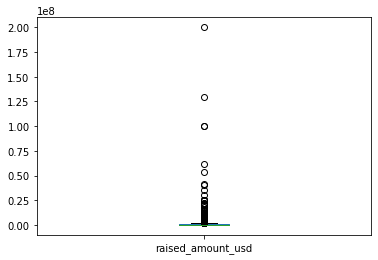

In [36]:
master_frame_seed.raised_amount_usd.plot(kind="box")
plt.show()

In [37]:
# let check the mean and median after removing the outliers
q1 = master_frame_seed.raised_amount_usd.quantile(0.25)
q2 = master_frame_seed.raised_amount_usd.quantile(0.75)
IQR = q2-q1

In [38]:
lower_limit = q1 - ((1.5)*IQR)
lower_limit

-1352223.125

In [39]:
upper_limit = q2 + ((1.5)*IQR)
upper_limit

2411333.875

In [40]:
master_frame_seed_outliers_removed = master_frame_seed[(master_frame_seed.raised_amount_usd >= lower_limit) & (master_frame_seed.raised_amount_usd<=upper_limit)]
master_frame_seed_outliers_removed

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
13,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/03b975068632eba5bfdb937ec8c07a68,seed,NaN,05-02-2014,150000.0
15,/organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,/funding-round/e82464f22241715dd1a6c77241055ed1,seed,NaN,20-07-2011,1000050.0
16,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012,/funding-round/6de4609e894495105bc791ed64361288,seed,NaN,18-02-2013,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114945,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0


In [41]:
master_frame_seed_outliers_removed.raised_amount_usd.describe()

count    2.218700e+04
mean     5.026031e+05
std      5.794619e+05
min      1.000000e+00
25%      5.000000e+04
50%      2.500000e+05
75%      7.902620e+05
max      2.410000e+06
Name: raised_amount_usd, dtype: float64

In [42]:
master_frame_seed_outliers_removed.raised_amount_usd.median()

250000.0

In [43]:
master_frame_seed_outliers_removed.raised_amount_usd.value_counts()

1000000.0    1065
100000.0      963
500000.0      960
40000.0       837
50000.0       823
             ... 
152686.0        1
1680239.0       1
55860.0         1
676246.0        1
401304.0        1
Name: raised_amount_usd, Length: 4602, dtype: int64

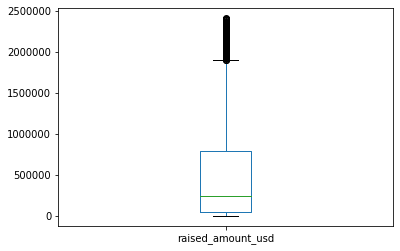

In [44]:
master_frame_seed_outliers_removed.raised_amount_usd.plot(kind="box")
plt.show()

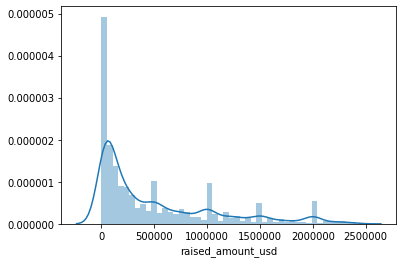

In [45]:
sns.distplot(master_frame_seed_outliers_removed.raised_amount_usd)
plt.show()

### Dataframe_angle

In [46]:
master_frame_angel = master_frame[master_frame["funding_round_type"].isin(["angel"])]
master_frame_angel

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
32,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0
69,/organization/10seconds-software,10seconds Software,http://www.10secondsSoftware.com,Enterprise Software|Mobility|Software,operating,AUS,2,Sydney,Sydney,01-07-2009,/funding-round/dacf342722793cb7485fbdbd7530461d,angel,NaN,01-07-2010,100000.0
93,/organization/121nexus,121nexus,http://www.121nexus.com,Health Diagnostics|Medical Devices|Personaliza...,operating,USA,RI,Providence,Providence,07-10-2011,/funding-round/9df05fa02b09752fcd0ecbf4e167cbef,angel,NaN,22-01-2013,500000.0
106,/organization/12return,12Return,http://www.12return.com,Consumer Goods|Retail|SaaS|Software,operating,NLD,11,NLD - Other,Gorinchem,10-12-2010,/funding-round/5002742a51863b56c788a14348c2c03a,angel,NaN,01-06-2012,619494.0
125,/organization/15five,15Five,http://15five.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011,/funding-round/6c390df9112bb5ee560d419450536bd7,angel,NaN,15-01-2013,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114888,/organization/zymeworks,Zymeworks,http://zymeworks.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-04-2004,/funding-round/79e1f098f8747d5e75495e3c4a21f685,angel,NaN,03-03-2008,1300000.0
114919,/organization/zynstra,Zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/dee233b3434185c14b3352034f72d798,angel,NaN,18-09-2012,2325000.0
114929,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/55f33b179dd6f4516315348c1e8350c6,angel,NaN,01-01-2008,2007363.0
114935,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,NaN,15-12-2010,875000.0


In [47]:
# here we see there is sudden jump from 75th percentile to max value
master_frame_angel.raised_amount_usd.describe()

count    4.829000e+03
mean     9.648489e+05
std      7.427731e+06
min      1.200000e+01
25%      1.500000e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

In [48]:
# here we can see 95% of the data is less than 2.7M and and by this we can say that the effect of outliers is more
master_frame_angel.raised_amount_usd.quantile(0.95)

2742375.9999999898

In [49]:
master_frame_angel.raised_amount_usd.median()

400000.0

In [50]:
master_frame_angel.raised_amount_usd.value_counts()

500000.0     276
1000000.0    268
100000.0     246
250000.0     174
300000.0     153
            ... 
222500.0       1
248879.0       1
230701.0       1
171392.0       1
774183.0       1
Name: raised_amount_usd, Length: 1481, dtype: int64

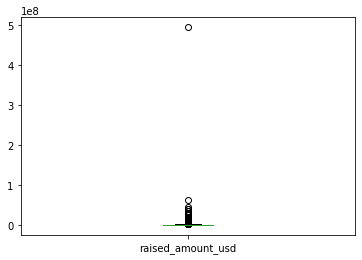

In [51]:
master_frame_angel.raised_amount_usd.plot(kind="box")
plt.show()

In [52]:
# let see the mean and median after removing the outliers
q1 = master_frame_angel.raised_amount_usd.quantile(0.25)
q2 = master_frame_angel.raised_amount_usd.quantile(0.75)
IQR = q2-q1

In [53]:
lower_limit = q1 - ((1.5)*IQR)
lower_limit

-1125000.0

In [54]:
upper_limit = q2 + ((1.5)*IQR)
upper_limit

2275000.0

In [55]:
master_frame_angel_outliers_removed = master_frame_angel[(master_frame_angel.raised_amount_usd >= lower_limit) & (master_frame_angel.raised_amount_usd<=upper_limit)]
master_frame_angel_outliers_removed

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
69,/organization/10seconds-software,10seconds Software,http://www.10secondsSoftware.com,Enterprise Software|Mobility|Software,operating,AUS,2,Sydney,Sydney,01-07-2009,/funding-round/dacf342722793cb7485fbdbd7530461d,angel,NaN,01-07-2010,100000.0
93,/organization/121nexus,121nexus,http://www.121nexus.com,Health Diagnostics|Medical Devices|Personaliza...,operating,USA,RI,Providence,Providence,07-10-2011,/funding-round/9df05fa02b09752fcd0ecbf4e167cbef,angel,NaN,22-01-2013,500000.0
106,/organization/12return,12Return,http://www.12return.com,Consumer Goods|Retail|SaaS|Software,operating,NLD,11,NLD - Other,Gorinchem,10-12-2010,/funding-round/5002742a51863b56c788a14348c2c03a,angel,NaN,01-06-2012,619494.0
125,/organization/15five,15Five,http://15five.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011,/funding-round/6c390df9112bb5ee560d419450536bd7,angel,NaN,15-01-2013,1000000.0
126,/organization/15five,15Five,http://15five.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-05-2011,/funding-round/e7ce4181f0de392140ff584986340a54,angel,NaN,01-01-2012,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114875,/organization/zykis,Zykis,http://zykis.com,Automotive|Data Security|Education|Kids|Portal...,closed,USA,CA,Anaheim,Irvine,27-10-2006,/funding-round/011dd3fab2a2535b6af2ceb58aee1390,angel,NaN,27-10-2006,800000.0
114888,/organization/zymeworks,Zymeworks,http://zymeworks.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-04-2004,/funding-round/79e1f098f8747d5e75495e3c4a21f685,angel,NaN,03-03-2008,1300000.0
114929,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/55f33b179dd6f4516315348c1e8350c6,angel,NaN,01-01-2008,2007363.0
114935,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/cc8cd96a500332d5b4f4bcbddb306099,angel,NaN,15-12-2010,875000.0


In [56]:
master_frame_angel_outliers_removed.raised_amount_usd.describe()

count    4.511000e+03
mean     5.369964e+05
std      5.149583e+05
min      1.200000e+01
25%      1.500000e+05
50%      3.522030e+05
75%      7.730915e+05
max      2.265394e+06
Name: raised_amount_usd, dtype: float64

In [57]:
master_frame_angel_outliers_removed.raised_amount_usd.median()

352203.0

In [58]:
master_frame_angel_outliers_removed.raised_amount_usd.value_counts()

500000.0     276
1000000.0    268
100000.0     246
250000.0     174
300000.0     153
            ... 
129690.0       1
1239465.0      1
99995.0        1
537817.0       1
268305.0       1
Name: raised_amount_usd, Length: 1358, dtype: int64

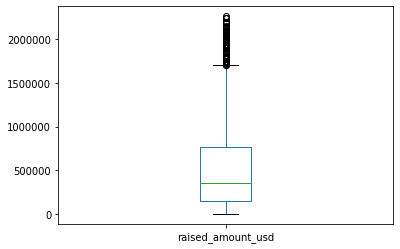

In [59]:
master_frame_angel_outliers_removed.raised_amount_usd.plot(kind="box")
plt.show()

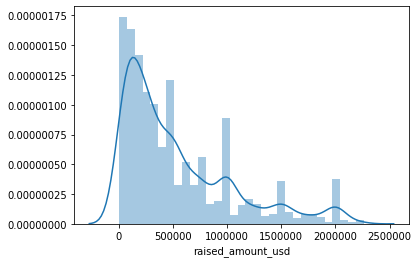

In [60]:
sns.distplot(master_frame_angel_outliers_removed.raised_amount_usd)
plt.show()

### Dataframe_venture

In [61]:
master_frame_venture = master_frame[master_frame["funding_round_type"].isin(["venture"])]
master_frame_venture

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [62]:
# here we see there is huge jump from 75th percentile to max value
master_frame_venture.raised_amount_usd.describe()

count    5.019900e+04
mean     1.175574e+07
std      8.637654e+07
min      1.000000e+00
25%      1.610000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [63]:
# here we can see 95% of the data is less than 40M and the rest of the values are skewing the data
master_frame_venture.raised_amount_usd.quantile(0.95)

40000000.0

In [64]:
master_frame_venture.raised_amount_usd.median()

5000000.0

In [65]:
master_frame_venture.raised_amount_usd.value_counts()

10000000.0    1809
5000000.0     1713
3000000.0     1215
2000000.0     1210
1000000.0     1138
              ... 
761971.0         1
6620000.0        1
2523550.0        1
206872.0         1
5.0              1
Name: raised_amount_usd, Length: 12548, dtype: int64

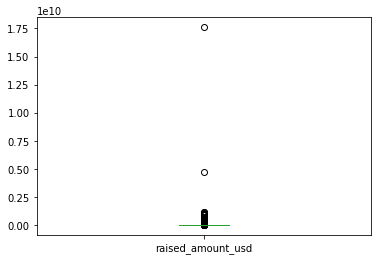

In [66]:
# outliers values are very high thus effected the data
master_frame_venture.raised_amount_usd.plot(kind="box")
plt.show()

In [67]:
# let see the mean and median after removing the outliers
q1 = master_frame_venture.raised_amount_usd.quantile(0.25)
q2 = master_frame_venture.raised_amount_usd.quantile(0.75)
IQR = q2-q1

In [68]:
lower_limit = q1 - ((1.5)*IQR)
lower_limit

-13975000.0

In [69]:
upper_limit = q2 + ((1.5)*IQR)
upper_limit

27585000.0

In [70]:
master_frame_venture_outliers_removed = master_frame_venture[(master_frame_venture.raised_amount_usd >= lower_limit) & (master_frame_venture.raised_amount_usd<=upper_limit)]
master_frame_venture_outliers_removed

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
114934,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
114936,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
114937,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [71]:
master_frame_venture_outliers_removed.raised_amount_usd.describe()

count    4.587500e+04
mean     6.434684e+06
std      6.383854e+06
min      1.000000e+00
25%      1.500000e+06
50%      4.223475e+06
75%      1.000000e+07
max      2.757661e+07
Name: raised_amount_usd, dtype: float64

In [72]:
master_frame_venture_outliers_removed.raised_amount_usd.median()

4223475.0

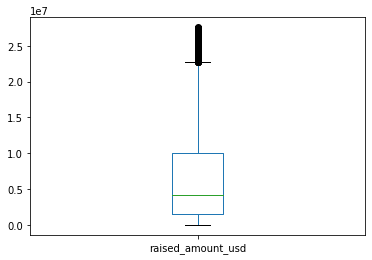

In [73]:
master_frame_venture_outliers_removed.raised_amount_usd.plot(kind="box")
plt.show()

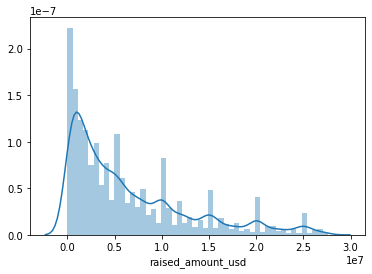

In [74]:
sns.distplot(master_frame_venture_outliers_removed.raised_amount_usd)
plt.show()

### Dataframe_private_equity

In [75]:
master_frame_private_equity = master_frame[master_frame["funding_round_type"].isin(["private_equity"])]
master_frame_private_equity

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0
153,/organization/1c-company,1C Company,http://1c.ru/eng,Games|Software|Video Games,closed,RUS,48,Moscow,Moscow,01-01-1991,/funding-round/679ae989d9dd8195e989dda21eff44b7,private_equity,NaN,03-10-2011,200000000.0
231,/organization/21st-century-oncology,21st Century Oncology,http://21stcenturyoncology.com,Health and Wellness,operating,USA,FL,Fort Myers,Fort Myers,NaN,/funding-round/261bff457e1b31c4879e786ab7cf80ab,private_equity,NaN,26-09-2014,325000000.0
312,/organization/2dheat,2DHeat,http://www.2dheat.com/,Clean Technology,operating,GBR,P2,Warrington,Warrington,NaN,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,NaN,24-10-2014,200708.0
326,/organization/2nd-story-software-inc,"2nd Story Software, Inc.",http://www.taxact.com,Software,acquired,USA,IA,Cedar Rapids,Cedar Rapids,15-02-1998,/funding-round/c7647b519b16454c1abe9f310ea2a34c,private_equity,NaN,30-03-2005,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114275,/organization/zimride,Zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.0
114406,/organization/ziptel,Ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.0
114644,/organization/zoot-2,ZOOT,http://www.zoot.cz/,E-Commerce|Fashion|Lifestyle,closed,NaN,NaN,NaN,NaN,01-09-2012,/funding-round/08888e5fa1a9ceac73f993e342866a63,private_equity,NaN,21-01-2015,6.0
114882,/organization/zyme-solutions,Zyme Solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.0


In [76]:
# here we see there is huge jump from 75th percentile to max value
master_frame_private_equity.raised_amount_usd.describe()

count    1.933000e+03
mean     7.342237e+07
std      1.982461e+08
min      6.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.500000e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [77]:
# here we can see from 96% to 97% there is a huge jump
master_frame_private_equity.raised_amount_usd.quantile(0.96)

320243111.2800002

In [78]:
master_frame_private_equity.raised_amount_usd.median()

20000000.0

In [79]:
master_frame_private_equity.raised_amount_usd.value_counts()

100000000.0    67
50000000.0     42
10000000.0     42
25000000.0     40
5000000.0      39
               ..
3434748.0       1
11999997.0      1
206850000.0     1
1309166.0       1
1660.0          1
Name: raised_amount_usd, Length: 940, dtype: int64

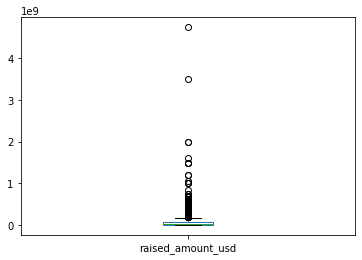

In [80]:
# outliers values are very high thus effected the data
master_frame_private_equity.raised_amount_usd.plot(kind="box")
plt.show()

In [81]:
# let see the mean and median after removing the outliers
q1 = master_frame_private_equity.raised_amount_usd.quantile(0.25)
q2 = master_frame_private_equity.raised_amount_usd.quantile(0.75)
IQR = q2-q1

In [82]:
lower_limit = q1 - ((1.5)*IQR)
lower_limit

-100000000.0

In [83]:
upper_limit = q2 + ((1.5)*IQR)
upper_limit

180000000.0

In [84]:
master_frame_private_equity_outliers_removed = master_frame_private_equity[(master_frame_private_equity.raised_amount_usd >= lower_limit) & (master_frame_private_equity.raised_amount_usd<=upper_limit)]
master_frame_private_equity_outliers_removed

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
21,/organization/1-800-publicrelations-inc-,"1-800-PublicRelations, Inc.",http://www.1800publicrelations.com,Internet Marketing|Media|Public Relations,operating,USA,NY,New York City,New York,24-10-2013,/funding-round/11c228f58831bc7ed337ef69ecc560c2,private_equity,NaN,01-02-2015,6000000.0
312,/organization/2dheat,2DHeat,http://www.2dheat.com/,Clean Technology,operating,GBR,P2,Warrington,Warrington,NaN,/funding-round/b1308b31d7a416eb1200b9bb42c9a08f,private_equity,NaN,24-10-2014,200708.0
326,/organization/2nd-story-software-inc,"2nd Story Software, Inc.",http://www.taxact.com,Software,acquired,USA,IA,Cedar Rapids,Cedar Rapids,15-02-1998,/funding-round/c7647b519b16454c1abe9f310ea2a34c,private_equity,NaN,30-03-2005,85000000.0
534,/organization/3power-energy-group,3POWER ENERGY GROUP,http://www.3powerenergy.com,Clean Technology,operating,GBR,K4,Plymouth,Plymouth,NaN,/funding-round/30d107e92eddb3b3791013d29328986d,private_equity,NaN,11-03-2011,50000000.0
540,/organization/3scale,3scale,http://www.3scale.net,Developer APIs|Enterprise Software|Infrastruct...,operating,USA,CA,SF Bay Area,San Francisco,01-12-2007,/funding-round/9e87c098957bd69cc8b5bb544b8cf351,private_equity,NaN,24-04-2013,4200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114275,/organization/zimride,Zimride,http://zimride.com,Public Transportation,acquired,USA,CA,SF Bay Area,San Francisco,NaN,/funding-round/51a74eb30b3c0470e84d0f7387be9909,private_equity,NaN,30-01-2013,15000000.0
114406,/organization/ziptel,Ziptel,http://ziptel.com.au,Communications Hardware|Telecommunications|Wir...,ipo,AUS,8,Perth,Subiaco,NaN,/funding-round/f13b715340329fa9a387f919625cc54d,private_equity,NaN,10-11-2014,4319243.0
114644,/organization/zoot-2,ZOOT,http://www.zoot.cz/,E-Commerce|Fashion|Lifestyle,closed,NaN,NaN,NaN,NaN,01-09-2012,/funding-round/08888e5fa1a9ceac73f993e342866a63,private_equity,NaN,21-01-2015,6.0
114882,/organization/zyme-solutions,Zyme Solutions,http://www.zymesolutions.com,Hardware|Hardware + Software,operating,USA,CA,SF Bay Area,Redwood Shores,01-01-2004,/funding-round/b2cfedffee4860384ce7293a6e8db5da,private_equity,NaN,20-05-2013,5000000.0


In [85]:
master_frame_private_equity_outliers_removed.raised_amount_usd.describe()

count    1.754000e+03
mean     3.501767e+07
std      4.106894e+07
min      6.000000e+00
25%      4.817264e+06
50%      1.500000e+07
75%      5.500000e+07
max      1.750000e+08
Name: raised_amount_usd, dtype: float64

In [86]:
master_frame_private_equity_outliers_removed.raised_amount_usd.median()

15000000.0

In [87]:
master_frame_private_equity_outliers_removed.raised_amount_usd.value_counts()

100000000.0    67
10000000.0     42
50000000.0     42
25000000.0     40
5000000.0      39
               ..
14800000.0      1
6023000.0       1
4499250.0       1
1542600.0       1
1660.0          1
Name: raised_amount_usd, Length: 846, dtype: int64

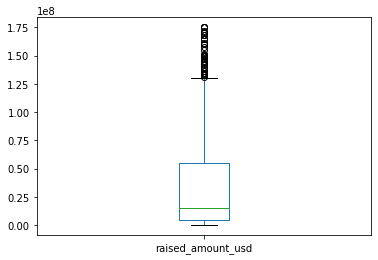

In [88]:
master_frame_private_equity_outliers_removed.raised_amount_usd.plot(kind="box")
plt.show()

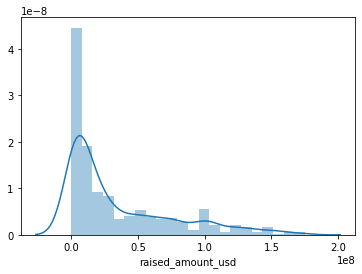

In [89]:
sns.distplot(master_frame_private_equity_outliers_removed.raised_amount_usd)
plt.show()

In [90]:
# over all view of the data
data = {"funding_type":['seed','angel','venture', 'private_equity'],"mean":[7.227269e+05,9.648489e+05,1.175574e+07,7.342237e+07],"median":[280000,400000.0,5000000.0,20000000.0],"mean_outliers_removed":[5.026031e+05,5.369964e+05,6.434684e+06,3.501767e+07],"median_outliers_removed":[250000.0,352203.0,4223475.0,15000000.0]}

In [91]:
# After observing the above plots we can say that even after treating the outliers the data is still skewed.
# So considering median may not represent the complete data.
# so after seeing the pie chart and the table below we can say that venture type is best type of investment for sparks funds
data1 = pd.DataFrame(data)
data1

,funding_type,mean,median,mean_outliers_removed,median_outliers_removed
0,seed,722726.9,280000.0,502603.1,250000.0
1,angel,964848.9,400000.0,536996.4,352203.0
2,venture,11755740.0,5000000.0,6434684.0,4223475.0
3,private_equity,73422370.0,20000000.0,35017670.0,15000000.0


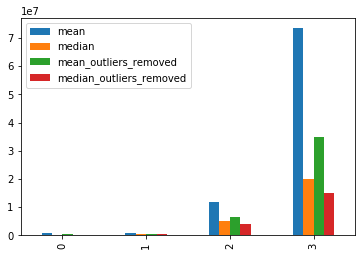

In [92]:
data1.plot(kind="bar")

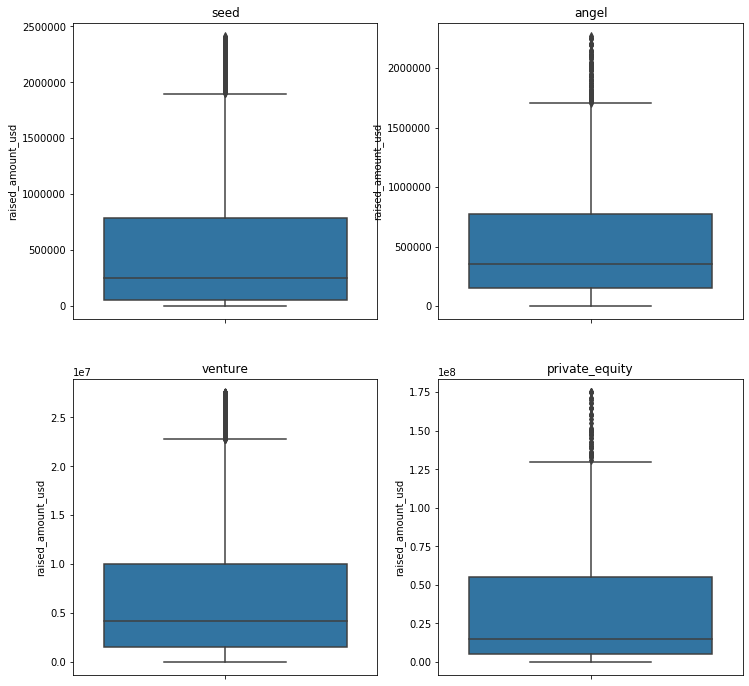

In [93]:
# all the box plot of the distribution for different investment type after removing the outliers
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("seed")
sns.boxplot(master_frame_seed_outliers_removed.raised_amount_usd,orient="v")
plt.subplot(2,2,2)
plt.title("angel")
sns.boxplot(master_frame_angel_outliers_removed.raised_amount_usd,orient="v")
plt.subplot(2,2,3)
plt.title("venture")
sns.boxplot(master_frame_venture_outliers_removed.raised_amount_usd,orient="v")
plt.subplot(2,2,4)
plt.title("private_equity")
sns.boxplot(master_frame_private_equity_outliers_removed.raised_amount_usd,orient="v")

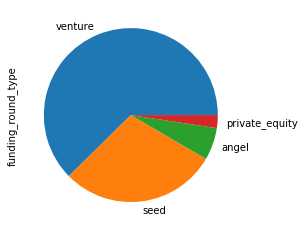

In [94]:
# Here we can see that venture type funding is the most occuring one.
master_frame.funding_round_type.value_counts().plot(kind="pie")

## Country analysis.

In [95]:
master_frame_venture1 = master_frame_venture.reset_index(drop=True)
master_frame_venture1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50194,/organization/zyraz-technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
50195,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
50196,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
50197,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [96]:
# Here we can see that 2117 rows donot have country name mentioned.(This can we removed)
master_frame_venture1.isnull().sum()

permalink                      0
name                           0
homepage_url                2608
category_list                498
status                         0
country_code                2115
state_code                  2859
region                      2710
city                        2710
founded_at                  9629
funding_round_permalink        0
funding_round_type             0
funding_round_code         22171
funded_at                      0
raised_amount_usd              0
dtype: int64

In [97]:
master_frame_venture1.name = master_frame_venture1.name.apply(lambda x: x.lower())
master_frame_venture1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50194,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
50196,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
50197,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [98]:
master_frame_venture1 = master_frame_venture1[-(master_frame_venture1.country_code.isnull())]
master_frame_venture1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
5,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50194,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
50196,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
50197,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [99]:
# creating the dataframe with only country code and sum of the amount raised
data_countries = pd.DataFrame(master_frame_venture1.groupby(["country_code"])["raised_amount_usd"].sum())
data_countries = data_countries.reset_index()
data_countries["sum_of_raised_amount_usd"] = data_countries["raised_amount_usd"]
data_countries = data_countries.drop(columns="raised_amount_usd")
data_countries

,country_code,sum_of_raised_amount_usd
0,ARE,3.426175e+08
1,ARG,3.143388e+08
2,ARM,2.651750e+07
3,AUS,1.322935e+09
4,AUT,6.309550e+08
...,...,...
92,UKR,1.779246e+07
93,URY,1.983000e+07
94,USA,4.225108e+11
95,VNM,8.488051e+07


In [100]:
# sorting the obtained data
data_countries = data_countries.sort_values("sum_of_raised_amount_usd",ascending=False)
data_countries.head(20)

,country_code,sum_of_raised_amount_usd
94,USA,4.225108e+11
15,CHN,3.983542e+10
29,GBR,2.024563e+10
39,IND,1.439186e+10
12,CAN,9.583332e+09
28,FRA,7.259537e+09
42,ISR,6.907515e+09
21,DEU,6.346960e+09
45,JPN,3.363677e+09
84,SWE,3.254953e+09


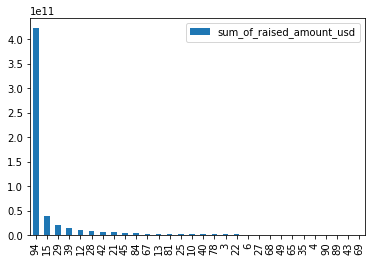

In [101]:
# top 30 countries(includes both english speakin and non english speaking) having highest funds
data_countries.head(30).plot(kind= "bar")
plt.show()

In [102]:
# After looking into wiki, we can see that from the 1st thirty countries only 9 countries speak english or their one of the official language is english
data_countries.country_code.unique()

array(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN',
       'SWE', 'NLD', 'CHE', 'SGP', 'ESP', 'BRA', 'IRL', 'RUS', 'AUS',
       'DNK', 'BEL', 'FIN', 'NOR', 'KOR', 'MYS', 'HKG', 'AUT', 'TWN',
       'TUR', 'ITA', 'NZL', 'LUX', 'ARE', 'ARG', 'BMU', 'IDN', 'EGY',
       'NGA', 'ZAF', 'MEX', 'CZE', 'PRT', 'POL', 'PHL', 'THA', 'COL',
       'EST', 'ISL', 'LTU', 'VNM', 'PAK', 'CYP', 'CYM', 'TAN', 'KEN',
       'GIB', 'HUN', 'GHA', 'CHL', 'MAF', 'JOR', 'ARM', 'LVA', 'URY',
       'ROM', 'UKR', 'MLT', 'KNA', 'KWT', 'LIE', 'MNE', 'SVN', 'BGR',
       'KAZ', 'GRC', 'BAH', 'TTO', 'SVK', 'BGD', 'LBN', 'GGY', 'TUN',
       'SEN', 'HRV', 'UGA', 'PER', 'BWA', 'LAO', 'PAN', 'MAR', 'MUS',
       'PRI', 'ECU', 'MCO', 'SAU', 'CMR', 'GTM', 'MMR'], dtype=object)

In [103]:
# Top 9 countrie with highest funding
data_countries_top9  = data_countries.head(9)
data_countries_top9 = data_countries_top9.reset_index(drop=True)
data_countries_top9

,country_code,sum_of_raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


#### Top 3  english speaking countries

In [104]:
top3 = data_countries_top9[data_countries_top9.country_code.isin(['USA', 'GBR', 'IND'])]
top3

,country_code,sum_of_raised_amount_usd
0,USA,4.225108e+11
2,GBR,2.024563e+10
3,IND,1.439186e+10


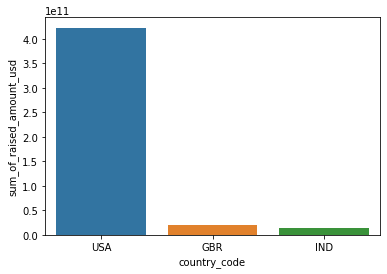

In [105]:
# top 3 countries(includes both english speakin and  english as official language) having highest funds
sns.barplot(top3.country_code,top3.sum_of_raised_amount_usd)
plt.show()

In [106]:
# top 9 english speaking countries for reference
data_countries_top9_englishspeaking = data_countries[data_countries.country_code.isin(['USA', 'GBR', 'IND','CAN','ISR', 'SGP', 'IRL', 'AUS','NZL'])]
data_countries_top9_englishspeaking = data_countries_top9_englishspeaking.reset_index(drop=True)
data_countries_top9_englishspeaking

,country_code,sum_of_raised_amount_usd
0,USA,4.225108e+11
1,GBR,2.024563e+10
2,IND,1.439186e+10
3,CAN,9.583332e+09
4,ISR,6.907515e+09
5,SGP,2.793918e+09
6,IRL,1.676131e+09
7,AUS,1.322935e+09
8,NZL,4.483164e+08


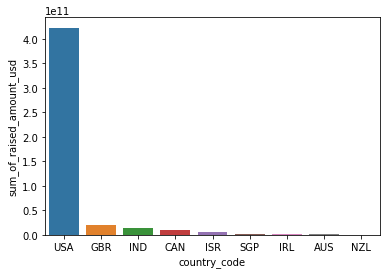

In [107]:
# top 9 countries(includes both english speakin and  english as official language) having highest funds
sns.barplot(data_countries_top9_englishspeaking.country_code,data_countries_top9_englishspeaking.sum_of_raised_amount_usd)
plt.show()

## Sector Analysis

In [108]:
master_frame_venture1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
3,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
5,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50194,/organization/zyraz-technology,zyraz technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,A,09-10-2009,7991547.0
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0
50196,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0
50197,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2686600.0


In [109]:
# There is no null charecter in country_code
master_frame_venture1.isnull().sum()

permalink                      0
name                           0
homepage_url                2175
category_list                298
status                         0
country_code                   0
state_code                   744
region                       595
city                         595
founded_at                  8549
funding_round_permalink        0
funding_round_type             0
funding_round_code         21280
funded_at                      0
raised_amount_usd              0
dtype: int64

In [110]:
# checking the number of unique categorie before and after cleaning the multiple sub-sectors
print(list(master_frame_venture1.category_list.unique()))
print(master_frame_venture1.category_list.unique().size)

['Media', 'Curated Web', 'Biotechnology', 'Analytics', 'Apps|Cable|Distribution|Software', 'Education', 'Local Businesses|Restaurants', 'Cosmetics|Marketplaces', 'Games|Media', 'Hospitality', 'Health Care|Health Care Information Technology|Hospitals', 'Software', 'Biotechnology|Technology', 'Social Travel', 'Enterprise Software', 'E-Commerce|SaaS', nan, 'Service Providers|Technology', 'Mobile|Service Providers|Software', 'Manufacturing', 'Advertising|Big Data Analytics|Interest Graph', 'Public Transportation', 'Internet', 'Travel', 'Education|Language Learning', 'Advertising|Advertising Platforms|Promotional', 'Finance|FinTech', 'Clean Technology|Residential Solar', 'Health Care|Insurance|Medical', 'E-Commerce', 'Health and Wellness|Health Care|Services', 'Analytics|Big Data|Enterprise Software|Market Research|Mobile|Software', 'Games', 'Biotechnology|Health Diagnostics', 'Mobile', 'News', 'Art|E-Commerce|Social Commerce', 'Big Data|Bitcoin|Hardware + Software|Technology', 'Software|We

In [111]:
print(master_frame_venture1.category_list.apply(lambda x: str(x).split("|")[0]).unique())
print(master_frame_venture1.category_list.apply(lambda x: str(x).split("|")[0]).unique().size)

['Media' 'Curated Web' 'Biotechnology' 'Analytics' 'Apps' 'Education'
 'Local Businesses' 'Cosmetics' 'Games' 'Hospitality' 'Health Care'
 'Software' 'Social Travel' 'Enterprise Software' 'E-Commerce' 'nan'
 'Service Providers' 'Mobile' 'Manufacturing' 'Advertising'
 'Public Transportation' 'Internet' 'Travel' 'Finance' 'Clean Technology'
 'Health and Wellness' 'News' 'Art' 'Big Data' 'EdTech' 'Computers'
 'Services' 'Cloud Computing' 'Credit Cards' 'Hardware + Software'
 'Internet of Things' 'Cloud Infrastructure' 'SaaS' 'Messaging'
 'Information Technology' 'Consumer Electronics' 'Data Centers'
 'Artificial Intelligence' 'Android' 'Blogging Platforms'
 'Customer Service' '3D Technology' '3D' '3D Printing' 'Drones'
 'Automated Kiosk' 'Music' 'Semiconductors' 'Web Hosting'
 'Cloud Data Services' 'Consulting' 'Game' 'Physical Security' 'Coupons'
 'Security' 'Databases' 'Flash Storage' 'Machine Learning'
 'Commercial Real Estate' 'Anything Capital Intensive' 'Automotive'
 'Ad Targeting' 

 'Gift Registries' 'Task Management']
604


In [112]:
master_frame_sector_analysis = master_frame_venture1[master_frame_venture1.country_code.isin(['USA', 'GBR', 'IND'])]
master_frame_sector_analysis

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0
5,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0
6,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0
7,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50191,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0
50192,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0
50193,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0


In [113]:
master_frame_sector_analysis["primary_sector"] = master_frame_sector_analysis.category_list.apply(lambda x: str(x).split("|")[0])
master_frame_sector_analysis

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
5,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
6,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
7,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50191,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology
50192,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
50193,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce


In [114]:
master_frame_sector_analysis.primary_sector = master_frame_sector_analysis.primary_sector.apply(lambda x: x.lower())
master_frame_sector_analysis

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media
4,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,analytics
5,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,analytics
6,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics
7,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50191,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,biotechnology
50192,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,biotechnology
50193,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,biotechnology
50195,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,e-commerce


In [115]:
# Here the mapping dataframe is wide format and need to convert int into long format
mapping = pd.read_csv("mapping.csv")
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [116]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: pandas.core.frame.DataFrame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> pandas.core.frame.DataFrame
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        `

In [117]:
id_vars = list(mapping.columns[0:1])
id_vars

['category_list']

In [118]:
# long format mapping dataframe
updated_mapping = pd.melt(mapping,id_vars=id_vars)
updated_mapping = updated_mapping[-(updated_mapping.value==0)]
updated_mapping = updated_mapping.drop(columns="value")
updated_mapping

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [119]:
# Renaming the columns name for convenience
updated_mapping = updated_mapping.rename(columns={"category_list": "primary_category_list","variable":"main_sector"})
updated_mapping

,primary_category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [120]:
updated_mapping.primary_category_list = updated_mapping.primary_category_list.apply(lambda x: str(x).lower())
updated_mapping.main_sector = updated_mapping.main_sector.apply(lambda x: str(x).lower())
updated_mapping

,primary_category_list,main_sector
8,adventure travel,automotive & sports
14,aerospace,automotive & sports
45,auto,automotive & sports
46,automated kiosk,automotive & sports
47,automotive,automotive & sports
...,...,...
6121,social recruiting,"social, finance, analytics, advertising"
6122,social television,"social, finance, analytics, advertising"
6123,social travel,"social, finance, analytics, advertising"
6134,stock exchanges,"social, finance, analytics, advertising"


In [121]:
# There are few categories which are missing or have been removed while chrunching down the problem.
print(updated_mapping.primary_category_list.isin((master_frame_sector_analysis.primary_sector)).value_counts())
print(master_frame_sector_analysis.primary_sector.isin(updated_mapping.primary_category_list).value_counts())

True     513
False    175
Name: primary_category_list, dtype: int64
True     36381
False     2615
Name: primary_sector, dtype: int64


In [122]:
# merging of two dataframe
sector_analysis = pd.merge(master_frame_sector_analysis,updated_mapping,how="left",left_on="primary_sector",right_on="primary_category_list")
sector_analysis

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,primary_category_list,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,media,entertainment
1,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,analytics,NaN,NaN
2,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,analytics,NaN,NaN
3,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics,NaN,NaN
4,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps,apps,"news, search and messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38991,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,biotechnology,biotechnology,cleantech / semiconductors
38992,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,biotechnology,biotechnology,cleantech / semiconductors
38993,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,biotechnology,biotechnology,cleantech / semiconductors
38994,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,e-commerce,e-commerce,others


In [123]:
# the below mentioned categories are not mapped to any of the main sector
print(sector_analysis[sector_analysis["primary_category_list"].isnull()].primary_sector)
print(sector_analysis[sector_analysis["primary_category_list"].isnull()].primary_sector.unique())

1                  analytics
2                  analytics
3                  analytics
12                 analytics
43                 analytics
                ...         
38867    property management
38881                finance
38882                finance
38883                finance
38884                finance
Name: primary_sector, Length: 2615, dtype: object
['analytics' 'finance' 'nanotechnology' 'business analytics'
 'contact management' 'financial services' 'career management'
 'cloud management' 'big data analytics' 'finance technology'
 'document management' 'digital signage' 'journalism' 'waste management'
 'energy management' 'lead management' 'event management' 'it management'
 'cannabis' 'investment management' 'knowledge management'
 'identity management' 'personalization' 'natural gas uses'
 'alternative medicine' 'natural language processing'
 'intellectual asset management' 'risk management' 'adaptive equipment'
 'supply chain management' 'innovation management' 'p

In [124]:
sector_analysis = sector_analysis.drop(columns="primary_category_list")
sector_analysis

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,entertainment
1,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,analytics,NaN
2,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,analytics,NaN
3,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics,NaN
4,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps,"news, search and messaging"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38991,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,biotechnology,cleantech / semiconductors
38992,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,biotechnology,cleantech / semiconductors
38993,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,biotechnology,cleantech / semiconductors
38994,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,e-commerce,others


### For coutry = USA

In [125]:
D1 = sector_analysis[(sector_analysis.raised_amount_usd >= 5000000) & (sector_analysis.raised_amount_usd<=15000000) & (sector_analysis.country_code == "USA")]
D1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
3,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,analytics,NaN
4,/organization/1-mainstream,1 mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,apps,"news, search and messaging"
17,/organization/128-technology,128 technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,service providers,others
20,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000.0,manufacturing,manufacturing
21,/organization/1366-technologies,1366 technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,09-04-2015,5000000.0,manufacturing,manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38984,/organization/zynga,zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/funding-round/8411431b5a0389a874e3fae93016c089,venture,B,24-04-2010,15000000.0,facebook applications,"social, finance, analytics, advertising"
38987,/organization/zynga,zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,A,12-02-2008,5026000.0,facebook applications,"social, finance, analytics, advertising"
38991,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,biotechnology,cleantech / semiconductors
38992,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,biotechnology,cleantech / semiconductors


In [126]:
pd.set_option("display.max_rows", 387)
D1_1 = pd.DataFrame(D1.groupby(["main_sector","primary_sector"])["raised_amount_usd"].sum())
D1_1

raised_amount_usd
main_sector                             primary_sector                                          
automotive & sports                     aerospace                                   1.092700e+08
                                        auto                                        3.310000e+07
                                        automated kiosk                             1.400000e+07
                                        automotive                                  6.660040e+08
                                        bicycles                                    1.000000e+07
                                        cad                                         1.715000e+07
                                        cars                                        6.488149e+07
                                        design                                      3.268293e+08
                                        designers                                   2.690000e+07
                                        drones                                      4.800000e+07
                                        electric vehicles                           1.476215e+07
                                        heavy industry                              1.300000e+07
                                        industrial automation                       1.800000e+07
                                        sports                                      6.920737e+07
                                        transportation                              2.300000e+07
blanks                                  nan                                         7.647633e+08
cleantech / semiconductors              bio-pharm                                   2.351165e+08
                                        biometrics                                  8.150000e+07
                                        biotechnology                               1.340634e+10
                                        bitcoin                                     8.450959e+07
                                        carbon                                      5.000000e+06
                                        chemicals                                   4.510000e+07
                                        clean energy                                2.755044e+08
                                        clean technology                            3.534544e+09
                                        commercial solar                            1.500000e+07
                                        commodities                                 5.520000e+06
                                        disruptive models                           9.200000e+06
                                        energy                                      1.359085e+08
                                        energy efficiency                           1.464670e+08
                                        energy it                                   6.709401e+06
                                        environmental innovation                    5.611420e+07
                                        home & garden                               2.100000e+07
                                        home automation                             8.940000e+07
                                        home decor                                  1.999989e+07
                                        lighting                                    2.800000e+07
                                        material science                            8.376852e+06
                                        mining technologies                         1.223321e+07
                                        renewable energies                          2.951597e+07
                                        semiconductor manufacturing equipment       1.250000e+07
                                        semiconductors                              2.904447e+09
     

In [127]:
D1_total_number_of_investments = pd.DataFrame(D1.groupby("main_sector")["primary_sector"].count())
D1_total_number_of_investments = D1_total_number_of_investments.sort_values("primary_sector",ascending=False)
D1_total_number_of_investments

,primary_sector
main_sector,
others,2923
cleantech / semiconductors,2297
"social, finance, analytics, advertising",1912
"news, search and messaging",1563
health,908
manufacturing,799
entertainment,580
automotive & sports,167
blanks,86


In [128]:
# Total number of Investments
D1_total_number_of_investments.primary_sector.sum()

11235

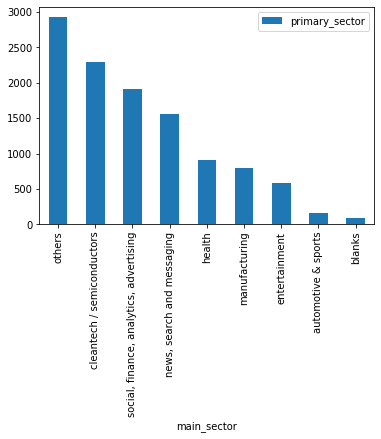

In [129]:
D1_total_number_of_investments.plot(kind= "bar")
plt.show()

In [130]:
D1_total_amount_of_investments = pd.DataFrame(D1_1.groupby("main_sector")["raised_amount_usd"].sum())
D1_total_amount_of_investments = D1_total_amount_of_investments.sort_values("raised_amount_usd",ascending=False)
D1_total_amount_of_investments

,raised_amount_usd
main_sector,
others,2.608928e+10
cleantech / semiconductors,2.118100e+10
"social, finance, analytics, advertising",1.668070e+10
"news, search and messaging",1.379682e+10
health,8.200859e+09
manufacturing,7.258553e+09
entertainment,5.000213e+09
automotive & sports,1.454104e+09
blanks,7.647633e+08


In [131]:
# Total amount of investment 
D1_total_amount_of_investments.raised_amount_usd.sum()

100426287841.0

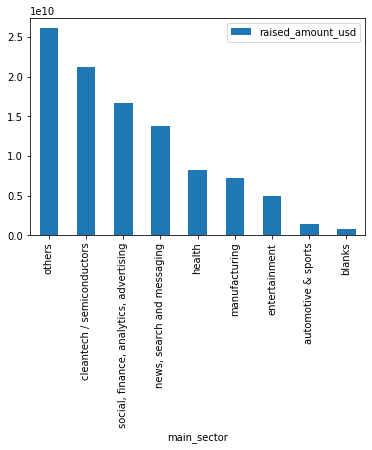

In [132]:
D1_total_amount_of_investments.plot(kind = "bar")
plt.show()

In [133]:
sector_analysis[sector_analysis.main_sector=="others"]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
5,/organization/10-minutes-with,10 minutes with,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,education,others
13,/organization/1010data,1010data,http://www.1010data.com,Software,acquired,USA,NY,New York City,New York,01-01-2000,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,NaN,08-03-2010,35000000.0,software,others
16,/organization/11i-solutions,11i solutions,http://www.11isolutions.com,Enterprise Software,closed,USA,AL,Huntsville,Huntsville,NaN,/funding-round/e07501ed6997290b1bef59406bc300a1,venture,NaN,22-03-2011,1800000.0,enterprise software,others
17,/organization/128-technology,128 technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,service providers,others
28,/organization/16-mile-solutions,16 mile solutions,NaN,Software,operating,USA,WA,Seattle,Seattle,01-01-2006,/funding-round/3a671cf6f08fe5d0a878f5627134384c,venture,NaN,11-06-2009,199957.0,software,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38971,/organization/zylie-the-bear,zylie the bear,http://zyliethebear.com,E-Commerce,operating,USA,CT,Hartford,Greenwich,01-01-2009,/funding-round/210831899fba3f59921e1ef5c17a95b4,venture,NaN,07-06-2012,75000.0,e-commerce,others
38972,/organization/zylun-staffing,zylun staffing,http://www.zylun.com,Software,operating,USA,UT,Salt Lake City,Lehi,01-01-2010,/funding-round/a991be2cd93e14d107d6aea8f41b3b4a,venture,NaN,28-08-2014,666154.0,software,others
38989,/organization/zynstra,zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/05f43b37c270f5919578281ce803de8f,venture,B,09-07-2014,8400000.0,software,others
38990,/organization/zynstra,zynstra,http://www.zynstra.com,Software,operating,GBR,A4,Bath,Bath,30-11-2011,/funding-round/129127802dd48be42d6cd45f65895245,venture,A,12-09-2013,3800000.0,software,others


In [134]:
D1_1_others = pd.DataFrame(D1.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D1_1_others = D1_1_others.reset_index()
D1_1_others = D1_1_others[D1_1_others.main_sector=="others"]
D1_1_others = D1_1_others.sort_values("raised_amount_usd", ascending=False)
D1_1_others.head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
5230,others,enterprise software,/organization/virtustream,virtustream,64300000.0
6471,others,web hosting,/organization/capella,capella photonics,54968051.0
5497,others,security,/organization/airtight-networks,airtight networks,54201907.0
4955,others,enterprise software,/organization/decarta,decarta,52100000.0
5438,others,open source,/organization/black-duck-software,black duck software,51000000.0


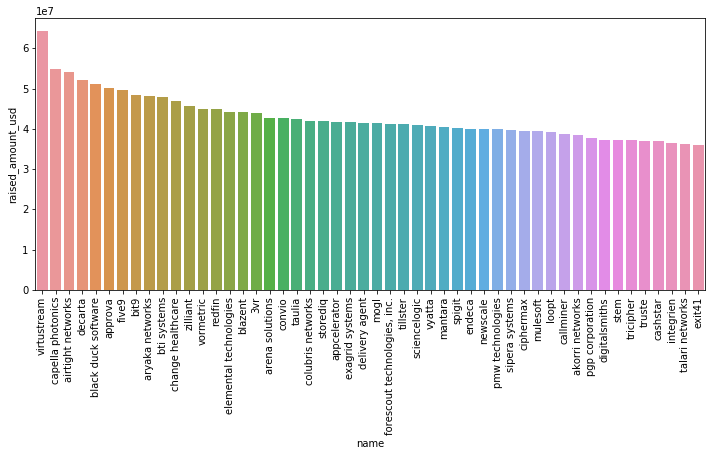

In [135]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D1_1_others.head(50).name,D1_1_others.head(50).raised_amount_usd)
plt.show()

In [136]:
D1_1_cleantech = pd.DataFrame(D1.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D1_1_cleantech = D1_1_cleantech.reset_index()
D1_1_cleantech = D1_1_cleantech[D1_1_cleantech.main_sector=="cleantech / semiconductors"]
D1_1_cleantech = D1_1_cleantech.sort_values("raised_amount_usd", ascending=False)
D1_1_cleantech.head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
430,cleantech / semiconductors,biotechnology,/organization/biodesix,biodesix,75300000.0
1540,cleantech / semiconductors,clean technology,/organization/tigo-energy,tigo energy,68739496.0
678,cleantech / semiconductors,biotechnology,/organization/forsight-labs,forsight labs,61300001.0
1082,cleantech / semiconductors,biotechnology,/organization/rheonix,rheonix,56124758.0
1497,cleantech / semiconductors,clean technology,/organization/scienergy,scienergy,55375423.0


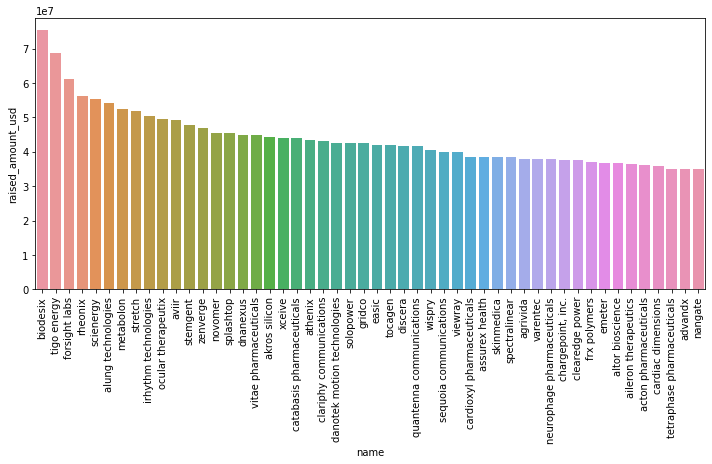

In [137]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D1_1_cleantech.head(50).name,D1_1_cleantech.head(50).raised_amount_usd)
plt.show()

### For coutry = U.K

In [138]:
D2 = sector_analysis[(sector_analysis.raised_amount_usd >= 5000000) & (sector_analysis.raised_amount_usd<=15000000) & (sector_analysis.country_code == "GBR")]
D2

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
108,/organization/365scores,365scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,01-01-2008,/funding-round/48212f931f542fdef78810bc87aef086,venture,B,29-09-2014,5500000.0,android,"social, finance, analytics, advertising"
234,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,A,01-01-2008,8468328.0,content creators,entertainment
235,/organization/7digital,7digital,http://about.7digital.com,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,01-01-2004,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,NaN,19-10-2012,10000000.0,content creators,entertainment
258,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,media,entertainment
259,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,media,entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38867,/organization/zoopla,zoopla,http://www.zoopla.co.uk,Property Management|Real Estate,ipo,GBR,H9,London,London,01-06-2007,/funding-round/98da1f441a55c9a9629a256828923e38,venture,B,19-01-2009,5440000.0,property management,NaN
38881,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/2a55d435c3433d8f903526c050c19361,venture,C,20-03-2007,12900000.0,finance,NaN
38882,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15000000.0,finance,NaN
38883,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01-03-2005,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,B,01-07-2006,5000000.0,finance,NaN


In [139]:
pd.set_option("display.max_rows", 628)
D2_2 = pd.DataFrame(D2.groupby(["main_sector","primary_sector"])["raised_amount_usd"].sum())
D2_2

raised_amount_usd
main_sector                             primary_sector                                       
automotive & sports                     automotive                                105272647.0
                                        cars                                       52500000.0
                                        design                                      9278918.0
blanks                                  nan                                        57764848.0
cleantech / semiconductors              biotechnology                             636958624.0
                                        bitcoin                                    10000000.0
                                        carbon                                      5500000.0
                                        clean technology                          277078825.0
                                        energy                                     21367489.0
                                        environmental innovation                   13004958.0
                                        gas                                        11460000.0
                                        semiconductors                            161535112.0
entertainment                           audio                                      14000000.0
                                        concerts                                   10000000.0
                                        content                                    23609715.0
                                        content creators                           31268328.0
                                        digital media                               5000000.0
                                        entertainment                              40601538.0
                                        fashion                                    48113769.0
                                        film                                        5000000.0
                                        gambling                                    5270000.0
                                        games                                     120762898.0
                                        media                                      20800000.0
                                        music                                      11000000.0
                                        photography                                17061005.0
                                        travel                                     86842096.0
                                        video                                      12000000.0
                                        wireless                                   10181710.0
health                                  beauty                                      8682611.0
                                        clinical trials                            18700000.0
                                        health and wellness                        27146494.0
                                        health care                               117669412.0
                                        health diagnostics                         24294694.0
                                        pets                                        7910327.0
                                        pharmaceuticals                            10133972.0
manufacturing                           3d                                         14529275.0
                                        3d printing                                10000000.0
                                        architecture                                5000000.0
                                        communications infrastructure               6500000.0
                                        consumer electronics                       22189920.0
                                        consumer goods                             15410642.0
                                  

In [140]:
D2_total_number_of_investments = pd.DataFrame(D2.groupby("main_sector")["primary_sector"].count())
D2_total_number_of_investments = D2_total_number_of_investments.sort_values("primary_sector",ascending=False)
D2_total_number_of_investments

,primary_sector
main_sector,
others,143
cleantech / semiconductors,127
"social, finance, analytics, advertising",98
"news, search and messaging",73
entertainment,54
manufacturing,42
health,24
automotive & sports,16
blanks,7


In [141]:
# Total number of Investments
D2_total_number_of_investments.primary_sector.sum()

584

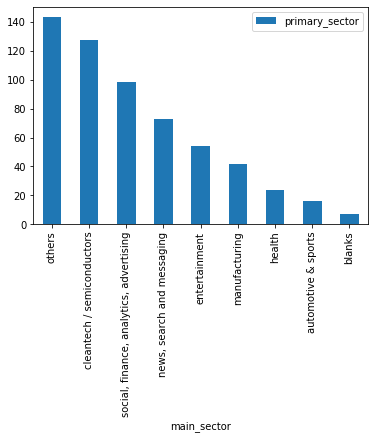

In [142]:
D2_total_number_of_investments.plot(kind= "bar")
plt.show()

In [143]:
D2_total_amount_of_investments = pd.DataFrame(D2_2.groupby("main_sector")["raised_amount_usd"].sum())
D2_total_amount_of_investments = D2_total_amount_of_investments.sort_values("raised_amount_usd",ascending=False)
D2_total_amount_of_investments

,raised_amount_usd
main_sector,
others,1.249124e+09
cleantech / semiconductors,1.136905e+09
"social, finance, analytics, advertising",8.218884e+08
"news, search and messaging",6.157462e+08
entertainment,4.615111e+08
manufacturing,3.619403e+08
health,2.145375e+08
automotive & sports,1.670516e+08
blanks,5.776485e+07


In [144]:
# Total amount of investment 
D2_total_amount_of_investments.raised_amount_usd.sum()

5086469206.0

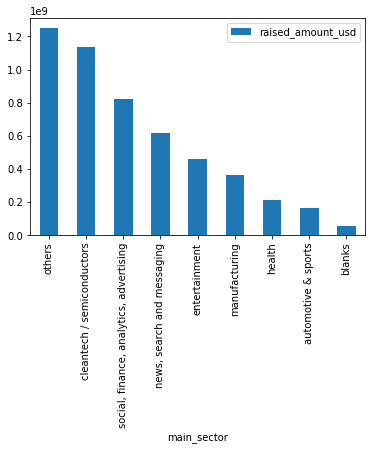

In [145]:
D2_total_amount_of_investments.plot(kind = "bar")
plt.show()

In [146]:
D2_2_others = pd.DataFrame(D2.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D2_2_others = D2_2_others.reset_index()
D2_2_others = D2_2_others[D2_2_others.main_sector=="others"]
D2_2_others = D2_2_others.sort_values("raised_amount_usd", ascending=False)
D2_2_others.head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
360,others,software,/organization/electric-cloud,electric cloud,37000000.0
346,others,security,/organization/sensage,sensage,36250000.0
312,others,enterprise software,/organization/enigmatic,enigmatec,32500000.0
384,others,technology,/organization/silverrail-technologies,silverrail technologies,29000000.0
392,others,web hosting,/organization/opencloud,opencloud,27972766.0


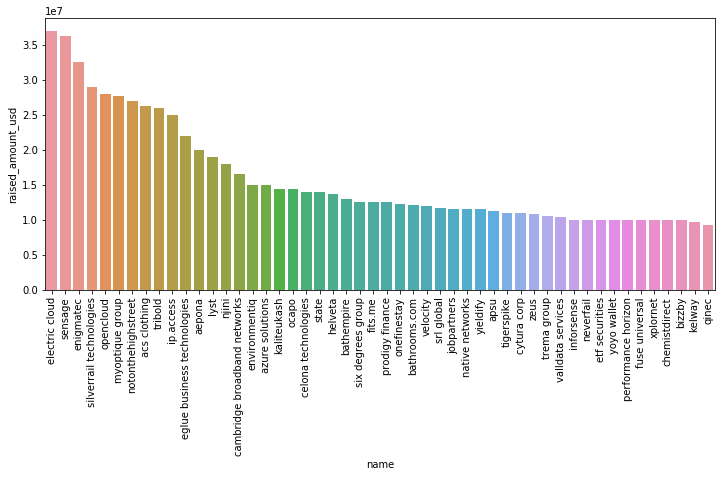

In [147]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D2_2_others.head(50).name,D2_2_others.head(50).raised_amount_usd)
plt.show()

In [148]:
D2_2_cleantech = pd.DataFrame(D2.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D2_2_cleantech = D2_2_cleantech.reset_index()
D2_2_cleantech = D2_2_cleantech[D2_2_cleantech.main_sector=="cleantech / semiconductors"]
D2_2_cleantech = D2_2_cleantech.sort_values("raised_amount_usd", ascending=False)
D2_2_cleantech.head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
29,cleantech / semiconductors,biotechnology,/organization/eusa-pharma,eusa pharma,35600000.0
35,cleantech / semiconductors,biotechnology,/organization/horizon-discovery,horizon discovery,31353719.0
31,cleantech / semiconductors,biotechnology,/organization/f-star-biotechnologische-forschu...,f-star biotechnology limited,29132906.0
110,cleantech / semiconductors,semiconductors,/organization/elixent,elixent,25000000.0
64,cleantech / semiconductors,biotechnology,/organization/takeda-cambridge,takeda cambridge,22340000.0


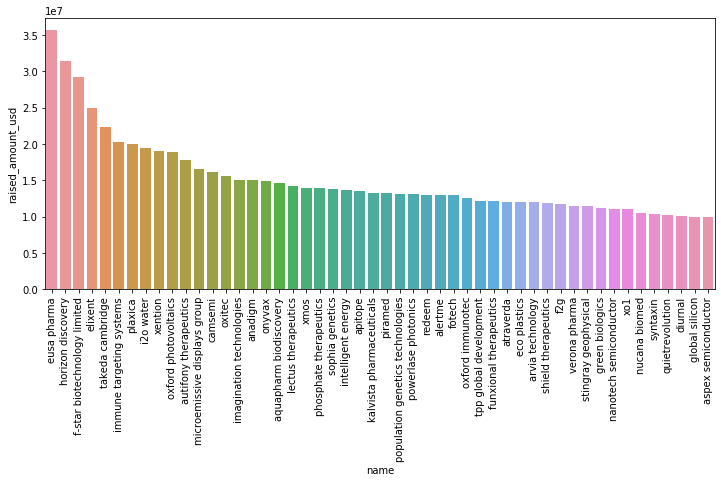

In [149]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D2_2_cleantech.head(50).name,D2_2_cleantech.head(50).raised_amount_usd)
plt.show()

### For coutry = India

In [150]:
D3 = sector_analysis[(sector_analysis.raised_amount_usd >= 5000000) & (sector_analysis.raised_amount_usd<=15000000) & (sector_analysis.country_code == "IND")]
D3

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,media,entertainment
55,/organization/21diamonds-india,21diamonds,http://www.21diamonds.de,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,C,15-11-2012,6369507.0,e-commerce,others
278,/organization/a-little-world,a little world,http://alittleworld.com,Finance,operating,IND,16,Mumbai,Mumbai,02-03-2000,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,B,09-09-2008,6410000.0,finance,NaN
933,/organization/adlabs-imagica,adlabs imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,entertainment,entertainment
1269,/organization/agile,agile,http://www.agile-ft.com,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,A,01-05-2011,5740000.0,finance,NaN
1529,/organization/akosha,akosha,http://www.akosha.com,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,01-06-2010,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,A,01-07-2014,5000000.0,consumer internet,"social, finance, analytics, advertising"
1924,/organization/amagi-media-labs,amagi media labs,http://amagi.com,Advertising,operating,IND,19,Bangalore,Bangalore,01-01-2008,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.0,advertising,"social, finance, analytics, advertising"
2028,/organization/ameyo,ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01-01-2003,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5000000.0,software,others
2220,/organization/ani-technologies,ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,A,10-04-2012,5000000.0,automotive,automotive & sports
2240,/organization/annapurna-microfinace,annapurna microfinace,http://ampl.net.in,Finance,operating,IND,21,Bhubaneswar,Bhubaneswar,01-01-2009,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,B,26-03-2014,5000000.0,finance,NaN


In [151]:
pd.set_option("display.max_rows", 87)
D3_3 = pd.DataFrame(D3.groupby(["main_sector","primary_sector"])["raised_amount_usd"].sum())
D3_3

raised_amount_usd
main_sector                             primary_sector                                  
automotive & sports                     aerospace                              6500000.0
                                        automotive                            76000000.0
                                        cars                                  15000000.0
                                        design                                 6400000.0
                                        designers                              5000000.0
                                        transportation                        28000000.0
blanks                                  nan                                   27000000.0
cleantech / semiconductors              biotechnology                         73530000.0
                                        clean technology                      91850000.0
entertainment                           content                               15500000.0
                                        content discovery                     10000000.0
                                        entertainment                          8180000.0
                                        events                                10000000.0
                                        fashion                               75500000.0
                                        game                                  15000000.0
                                        games                                 29750000.0
                                        hotels                                10000000.0
                                        interior design                        8000000.0
                                        media                                 10000000.0
                                        online gaming                         15000000.0
                                        resorts                               20000000.0
                                        restaurants                            6000000.0
                                        travel                                47900000.0
health                                  baby accessories                      10800000.0
                                        cosmetics                              8400000.0
                                        health and wellness                   79640000.0
                                        health care                           50400000.0
                                        pets                                   5000000.0
                                        public transportation                 13500000.0
manufacturing                           communications infrastructure         10000000.0
                                        computers                             34500000.0
                                        construction                          13000000.0
                                        consumer electronics                  16000000.0
                                        consumer goods                        23700000.0
                                        food processing                       50600000.0
                                        groceries                             10000000.0
                                        hardware + software                   20350000.0
                                        manufacturing                         22750000.0
news, search and messaging              apps                                  38665775.0
                                        browser extensions                     6500000.0
                                        classifieds                           20400000.0
                                        cloud computing                        6500000.0
                                        curated web                          110178770.0
                                        delivery                  

In [152]:
D3_total_number_of_investments = pd.DataFrame(D3.groupby("main_sector")["primary_sector"].count())
D3_total_number_of_investments = D3_total_number_of_investments.sort_values("primary_sector",ascending=False)
D3_total_number_of_investments

,primary_sector
main_sector,
others,109
"news, search and messaging",52
entertainment,33
"social, finance, analytics, advertising",32
manufacturing,21
cleantech / semiconductors,20
health,19
automotive & sports,13
blanks,2


In [153]:
# Total number of Investments
D3_total_number_of_investments.primary_sector.sum()

301

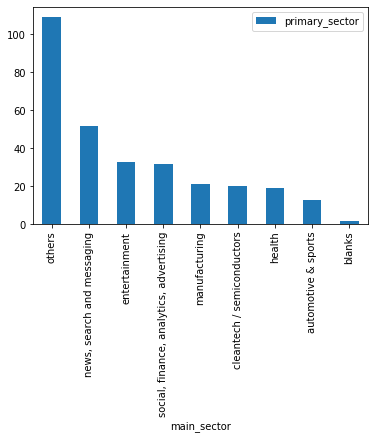

In [154]:
D3_total_number_of_investments.plot(kind= "bar")
plt.show()

In [155]:
D3_total_amount_of_investments = pd.DataFrame(D3_3.groupby("main_sector")["raised_amount_usd"].sum())
D3_total_amount_of_investments = D3_total_amount_of_investments.sort_values("raised_amount_usd",ascending=False)
D3_total_amount_of_investments

,raised_amount_usd
main_sector,
others,1.007410e+09
"news, search and messaging",4.338345e+08
"social, finance, analytics, advertising",2.905435e+08
entertainment,2.808300e+08
manufacturing,2.009000e+08
health,1.677400e+08
cleantech / semiconductors,1.653800e+08
automotive & sports,1.369000e+08
blanks,2.700000e+07


In [156]:
# Total amount of investment 
D3_total_amount_of_investments.raised_amount_usd.sum()

2710537552.0

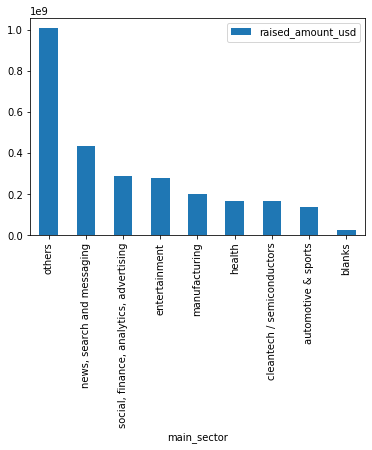

In [157]:
D3_total_amount_of_investments.plot(kind = "bar")
plt.show()

In [158]:
D3_3_others = pd.DataFrame(D3.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D3_3_others = D3_3_others.reset_index()
D3_3_others = D3_3_others[D3_3_others.main_sector=="others"]
D3_3_others = D3_3_others.sort_values("raised_amount_usd", ascending=False)
D3_3_others.head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
136,others,e-commerce,/organization/firstcry-com,firstcry.com,39000000.0
142,others,e-commerce,/organization/myntra,myntra,38000000.0
186,others,real estate,/organization/commonfloor,commonfloor,32900000.0
146,others,e-commerce,/organization/pepperfry-com,pepperfry.com,28000000.0
169,others,gift card,/organization/itzcash-card-ltd,itzcash card ltd.,25000000.0


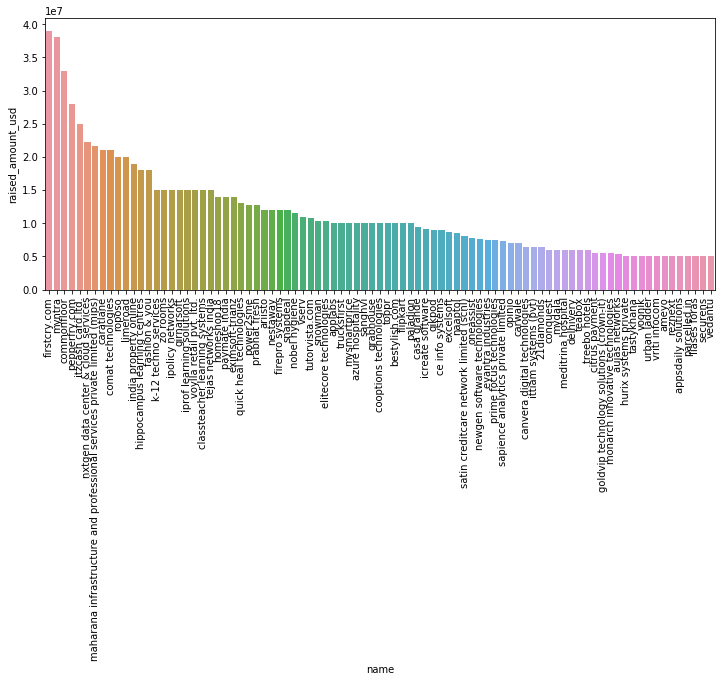

In [159]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D3_3_others.name,D3_3_others.raised_amount_usd)
plt.show()

In [160]:
D3_3_news = pd.DataFrame(D3.groupby(["main_sector","primary_sector","permalink","name"])["raised_amount_usd"].sum())
D3_3_news = D3_3_news.reset_index()
D3_3_news = D3_3_news[D3_3_news.main_sector=="news, search and messaging"]
D3_3_news = D3_3_news .sort_values("raised_amount_usd", ascending=False)
D3_3_news .head()

,main_sector,primary_sector,permalink,name,raised_amount_usd
118,"news, search and messaging",mobile,/organization/gupshup-technology-india-pvt-ltd,gupshup,33000000.0
119,"news, search and messaging",mobile,/organization/imimobile,imimobile,23000000.0
123,"news, search and messaging",mobile,/organization/sms-gupshup,sms gupshup,22000000.0
108,"news, search and messaging",delivery,/organization/roadrunnr,roadrunnr,21000000.0
116,"news, search and messaging",messaging,/organization/hike,hike,21000000.0


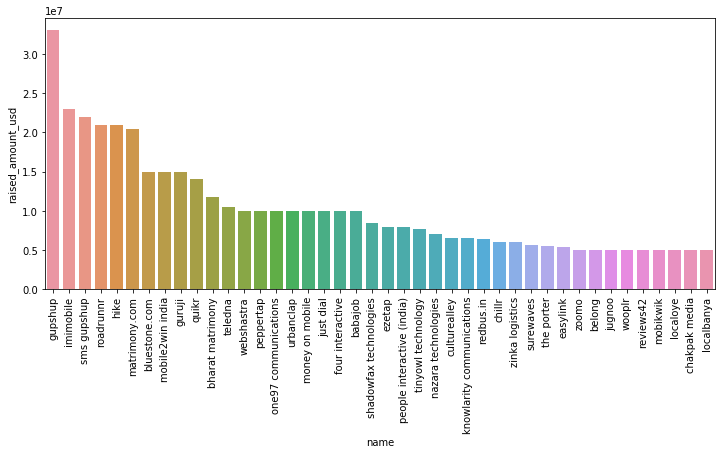

In [161]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.barplot(D3_3_news.name,D3_3_news.raised_amount_usd)
plt.show()

## Plots

### #plot1

In [162]:
# over all view of the data
data = {"funding_type":['seed','angel','venture', 'private_equity'],"mean_outliers_removed":[5.026031e+05,5.369964e+05,6.434684e+06,3.501767e+07]}
data1 = pd.DataFrame(data)
data1

,funding_type,mean_outliers_removed
0,seed,502603.1
1,angel,536996.4
2,venture,6434684.0
3,private_equity,35017670.0


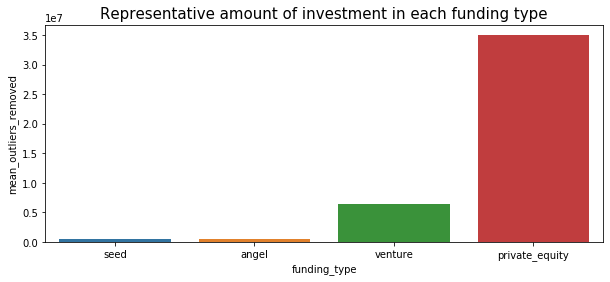

In [163]:
# Here we can clearly see that venture fall in the range of 5M to 15M 
plt.figure(figsize=(10,4))
plt.title("Representative amount of investment in each funding type",fontsize=15)
sns.barplot(data1.funding_type,data1.mean_outliers_removed)
plt.show()

### #plot2

In [164]:
# Top 9 countrie with highest funding
data_countries_top9  = data_countries.head(9)
data_countries_top9 = data_countries_top9.reset_index(drop=True)
data_countries_top9

,country_code,sum_of_raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


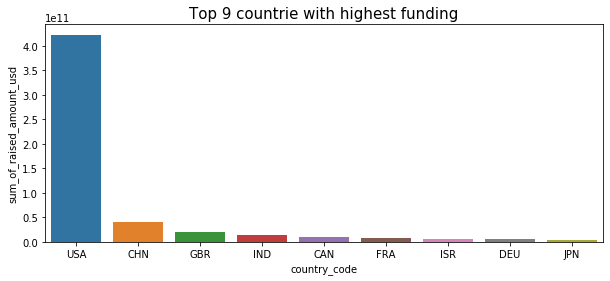

In [165]:
plt.figure(figsize=(10,4))
plt.title("Top 9 countrie with highest funding",fontsize=15)
sns.barplot(data_countries_top9.country_code,data_countries_top9.sum_of_raised_amount_usd)
plt.show()

### #plot3

In [166]:
D_plot = sector_analysis[(sector_analysis.raised_amount_usd >= 5000000) & (sector_analysis.raised_amount_usd<=15000000)]
D_plot = pd.DataFrame(D_plot.groupby(["country_code","main_sector"])["raised_amount_usd"].count())
D_plot = D_plot.reset_index()
D_plot

,country_code,main_sector,raised_amount_usd
0,GBR,automotive & sports,16
1,GBR,blanks,7
2,GBR,cleantech / semiconductors,127
3,GBR,entertainment,54
4,GBR,health,24
5,GBR,manufacturing,42
6,GBR,"news, search and messaging",73
7,GBR,others,143
8,GBR,"social, finance, analytics, advertising",98
9,IND,automotive & sports,13


In [167]:
D1_plot3 = D_plot[D_plot.country_code == "USA"]
D1_plot3 = D1_plot3.sort_values("raised_amount_usd",ascending=False)
D1_plot3

,country_code,main_sector,raised_amount_usd
25,USA,others,2923
20,USA,cleantech / semiconductors,2297
26,USA,"social, finance, analytics, advertising",1912
24,USA,"news, search and messaging",1563
22,USA,health,908
23,USA,manufacturing,799
21,USA,entertainment,580
18,USA,automotive & sports,167
19,USA,blanks,86


In [168]:
D2_plot3 = D_plot[D_plot.country_code == "GBR"]
D2_plot3 = D2_plot3.sort_values("raised_amount_usd",ascending=False)
D2_plot3

,country_code,main_sector,raised_amount_usd
7,GBR,others,143
2,GBR,cleantech / semiconductors,127
8,GBR,"social, finance, analytics, advertising",98
6,GBR,"news, search and messaging",73
3,GBR,entertainment,54
5,GBR,manufacturing,42
4,GBR,health,24
0,GBR,automotive & sports,16
1,GBR,blanks,7


In [169]:
D3_plot3 = D_plot[D_plot.country_code == "IND"]
D3_plot3 = D3_plot3.sort_values("raised_amount_usd",ascending=False)
D3_plot3

,country_code,main_sector,raised_amount_usd
16,IND,others,109
15,IND,"news, search and messaging",52
12,IND,entertainment,33
17,IND,"social, finance, analytics, advertising",32
14,IND,manufacturing,21
11,IND,cleantech / semiconductors,20
13,IND,health,19
9,IND,automotive & sports,13
10,IND,blanks,2


In [170]:
D_plot3 = pd.concat([D1_plot3.head(3),D2_plot3.head(3),D3_plot3.head(3)],ignore_index=True)
D_plot3

,country_code,main_sector,raised_amount_usd
0,USA,others,2923
1,USA,cleantech / semiconductors,2297
2,USA,"social, finance, analytics, advertising",1912
3,GBR,others,143
4,GBR,cleantech / semiconductors,127
5,GBR,"social, finance, analytics, advertising",98
6,IND,others,109
7,IND,"news, search and messaging",52
8,IND,entertainment,33


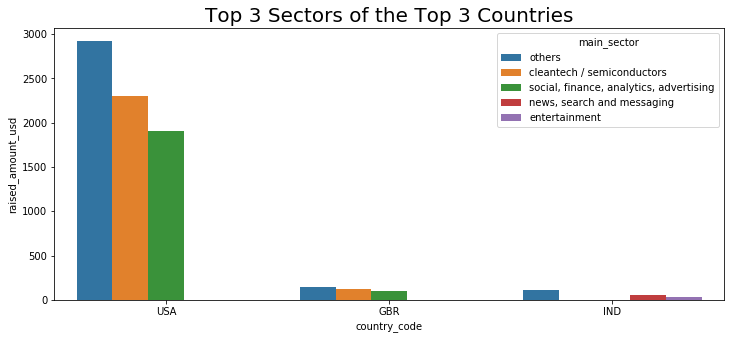

In [171]:
plt.figure(figsize=(12,5))
plt.title("Top 3 Sectors of the Top 3 Countries",fontsize=20)
sns.barplot(D_plot3.country_code,D_plot3.raised_amount_usd,hue=D_plot3.main_sector)
plt.show()